In [1]:
import sys
print(sys.version)

3.8.19 | packaged by conda-forge | (default, Mar 20 2024, 12:47:35) 
[GCC 12.3.0]


In [2]:
%pip install ncem

  Using cached ncem-0.1.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached diffxpy-0.7.4-py3-none-any.whl.metadata (2.2 kB)
  Using cached docrep-0.3.2.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Using cached joblib-1.4.0-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.7.5-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.7 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
  Using cached rich-10.16.2-py3-none-any.whl.metadata (19 kB)
  Using cached scanpy-1.9.8-py3-none-any.whl.metadata (6.0 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tensorflow-2.13.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached batchglm-0.7.4-py3-none-any.whl.metadata (2.8 kB)
  Using cached statsmodels-0.14.1-cp38-cp38-manylinux_2_17_x86_64.m

## Imports

In [10]:
%load_ext autoreload
%autoreload 2

import ncem as nc
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq

sc.settings.set_figure_params(dpi=80)

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
sc.logging.print_header()
print(f"ncem=={nc.__version__}")

scanpy==1.9.6 anndata==0.9.2 umap==0.5.6 numpy==1.22.4 scipy==1.9.1 pandas==2.0.3 scikit-learn==1.3.2 statsmodels==0.14.1 igraph==0.9.11 louvain==0.7.2 pynndescent==0.5.12
ncem==0.1.5


Bad start ... we were suppose to have this as a start :
scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.6 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.1.0 statsmodels==0.13.2 python-igraph==0.9.10 louvain==0.7.1 pynndescent==0.5.7
ncem==0.1.3

In [19]:
from ncem.interpretation import InterpreterInteraction
from ncem.data import get_data_custom, customLoader

## Dataset


Here we try with the dataset given in the tutorial. Afterwards we go on with our own data. 

In [23]:
ad = sq.datasets.mibitof()

100%|██████████| 19.3M/19.3M [00:05<00:00, 3.77MB/s]


In [24]:
ad

AnnData object with n_obs × n_vars = 3309 × 36
    obs: 'row_num', 'point', 'cell_id', 'X1', 'center_rowcoord', 'center_colcoord', 'cell_size', 'category', 'donor', 'Cluster', 'batch', 'library_id'
    var: 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2'
    uns: 'Cluster_colors', 'batch_colors', 'neighbors', 'spatial', 'umap'
    obsm: 'X_scanorama', 'X_umap', 'spatial'
    obsp: 'connectivities', 'distances'

In [25]:
ncem = InterpreterInteraction()

In [26]:
ncem.data = customLoader(
    adata=ad, cluster='Cluster', patient='donor', library_id='library_id', radius=52
)
get_data_custom(interpreter=ncem)

Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|██████████| 3/3 [00:00<00:00, 31.17it/s]

Loaded 3 images with complete data from 2 patients over 3309 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 9.969315
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 3309 cells out of 3 images from 2 patients.
Test dataset: 330 cells out of 3 images from 2 patients.
Training dataset: 2695 cells out of 3 images from 2 patients.
Validation dataset: 298 cells out of 3 images from 2 patients. 



## Variance Decompositon

In [36]:
var_decomp = ncem.data.compute_variance_decomposition()
ncem.data.variance_decomposition(var_decomp, figsize=(5,3))

  0%|          | 0/3 [00:00<?, ?it/s]


TypeError: 'Categorical' with dtype category does not support reduction 'mean'

## Cell heterogeneity attributed to niche composition



In [37]:
adata_img, adata, log_pval, fold_change = ncem.data.compute_cluster_enrichment(
    image_key=['point16', 'point23', 'point8'],
    target_cell_type='Tcell_CD8',
    clip_pvalues=-5,
    n_neighbors=22,
    n_pcs=None,
)

100%|██████████| 14/14 [00:03<00:00,  3.74it/s]


n cells:  464
Tcell_CD8 substates
Tcell_CD8 0    145
Tcell_CD8 1    117
Tcell_CD8 2     79
Tcell_CD8 3     69
Tcell_CD8 4     54
Name: count, dtype: int64


TypeError: category type does not support sum operations

In [40]:
sc.pl.umap(adata, color='Tcell_CD8 substates', palette='tab10')

NameError: name 'adata' is not defined

NameError: name 'adata_img' is not defined

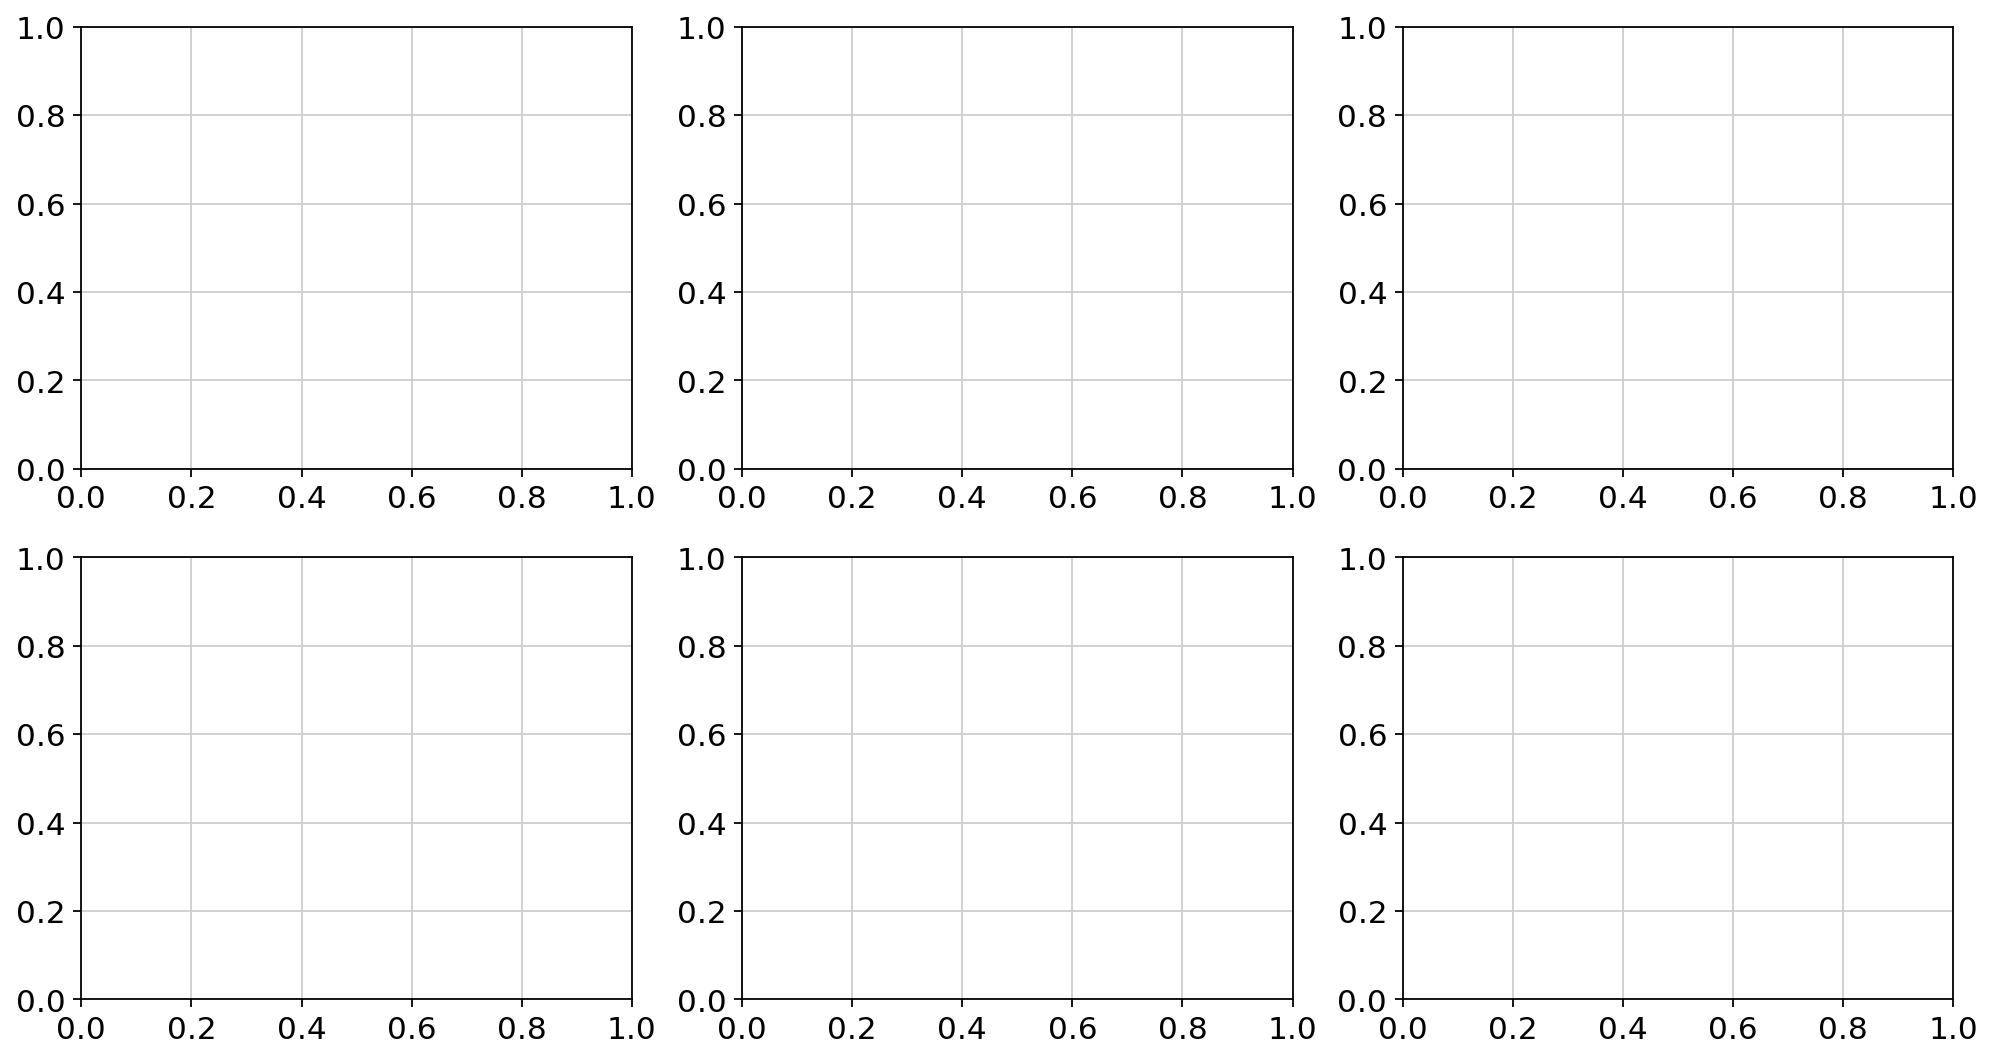

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
ax = ax.ravel()
for i, k in enumerate(['point16', 'point23', 'point8']):
    
    temp_adata = adata_img[adata_img.obs['library_id'] == k].copy()
    
    sc.pl.spatial(
        temp_adata,
        spot_size=30,
        ax=ax[i],
        show=False,
        na_color='whitesmoke',
        title=''
    )
    sc.pl.spatial(
        temp_adata[temp_adata.obs.Cluster.isin(['Epithelial', 'Tcell_CD8'])].copy(),
        color='Cluster',
        spot_size=30,
        ax=ax[i],
        show=False,
        title=k,
        palette={'Epithelial': '#8c564b', 'Tcell_CD8': '#d62728'}
    )
    
    sc.pl.spatial(
        adata_img[adata_img.obs.library_id == k].copy(),
        spot_size=30,
        ax=ax[i+3],
        show=False,
        title=''
    )
    sc.pl.spatial(
        adata[adata.obs.library_id == k].copy(),
        color='Tcell_CD8 substates',
        spot_size=30,
        ax=ax[i+3],
        show=False,
        title=k,
        palette='tab10'
    )
    
    ax[i].invert_yaxis()
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i+3].invert_yaxis()
    ax[i+3].set_xlabel('')
    ax[i+3].set_ylabel('')
plt.tight_layout()
plt.show()

In [42]:
ncem.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    pad=0.3,
    linspace=(-0.4, 0.4, 3),
    figsize=(3,6)
)

NameError: name 'log_pval' is not defined

## Type coupling analysis

## Putative sender-receiver dependencies

## Sender similarity analysis